# 2022_01_10_Problema 1

Para entrenar un modelo basado en máquinas de vectores soporte, se dispone de un conjunto de entrenamiento en $\mathbb{R}^2$.  Estos vectores y los correspondientes multiplicadores de Lagrange óptimos obtenidos con $C=10$ son:
$$\begin{array}{|l||rrrrrrrr|} % 
\hline
i      &  1 &    2 &  3  &   4 &   5 &  6  &  7 &  8 \\
\hline
x_{i1}  &  2 &    2 &  2  &   2 &  3  &  4  &  3 &  1 \\
x_{i2}   &  2 &   3 &  4  &   1 &  2  &  2  &  1 &  4\\
\hline
\text{Clase} & +1 & -1 & +1 & -1 & -1 & -1 & -1  & +1\\
\hline
\hline
\alpha^\star_i & 10.0 & 10.0 & 3.78 &~~3.11& 0.67 &~~0&~~0&  ~0 \\
\hline
\end{array}$$

Se pide:
1. Obtener la función discriminante lineal correspondiente
2. Obtener la ecuación de la frontera lineal de separación entre clases y representarla gráficamente junto con los vectores de entremamiento, indicando cuáles de ellos son vectores soporte
3. Obtener la toleranacia óptima de cada muestra de entrenamiento
4. Clasificar la muestra $(1,2)^t$

## Solución

**Pesos de la función discriminante:**

$\theta^*_1~=~
   (+1)~(2)~(10.0)   %3
   +(-1)~(2)~(10.0)   %4 
   +(+1)~(2)~(3.79)   %5
   +(-1)~(2)~(3.11)   %2
   +(-1)~(3)~(0.67)   %6
   =~-0.67$

$\theta^*_2~=~
   (+1)~(2)~(10.0)   %3
   +(-1)~(3)~(10.0)   %4 
   +(+1)~(4)~(3.79)   %5
   +(-1)~(1)~(3.11)   %2
   +(-1)~(2)~(0.67)   %6
   =~0.67$

Usando el vector soporte $\boldsymbol{x_4}$ (que verifica la condición : $0 < \alpha_1^* < C$)

$\theta^\star_0 = c_4-{\boldsymbol{\theta}^\star}^t\boldsymbol{x_4} = 1 - ((-0.67)~(2) + (0.67)~(1)) = -0.33$ 

Función discriminante lineal:

$\phi(\boldsymbol{x}) = -0.33 - 0.67~x_1 +  0.67~x_2$

**Frontera de separación y representación gráfica:**

Ecuación de la frontera lineal de separación:
$-0.33 - 0.67~x_1 +  0.67~x_2 ~=~ 0 ~~\rightarrow~~$ 
$  x_2 = 1.0~x_1 + 0.49\,$.

Los vectores de entrenamiento son todos los de la tabla.  De ellos,
los vectores soporte son: $(2,1)^t, (2,2)^t, (2,3)^t, (2,4)^t, (3,2)^t\,$.

Representación gráfica:
<div><img src="2022_01_10_Problema 1.png" width=400></div>

Al lado de cada muestra se muestra el valor del multiplicador de lagrange asociado y la tolerancia.

**Tolerancias:**

Todas las muestras bien clasificadas y fuera del margen ( $i\in\{3, 4, 5, 6, 7, 8\}$) tienen una tolerancia $\zeta_i^*=0$ y el resto
  
$\zeta_1^*~=~1-c_1~({\boldsymbol{\theta}^*}^t~\boldsymbol{x}_1+\theta_0^*)~=~1.33$

$\zeta_2^*~=~1-c_2~({\boldsymbol{\theta}^*}^t~\boldsymbol{x}_2+\theta_0^*)~=~1.33$

**Clasificación de la muestra $(1,2)^t$:**

El valor de la función discriminante para este vector es: $~\theta^*_0+1\,\theta^*_1+2\,\theta^*_2~=~0.34~>~0 ~\Rightarrow\,$ clase +1.

## Solución con sklearn

In [1]:
import numpy as np; np.set_printoptions(precision=4, suppress=True); from sklearn import svm
X = np.array([[2, 2], [2, 3], [2, 4], [2, 1], [3, 2], [4, 2], [3, 1], [1, 4]]).astype(np.float32)
y = np.array([1, -1, 1, -1, -1, -1, -1, 1]).astype(np.int32); N, D = X.shape
C = 10.0; clf = svm.SVC(C=C, kernel='linear').fit(X, y)
a = np.zeros(N); a[clf.support_] = clf.dual_coef_ * y[clf.support_]; print('alfa: ', a)
w = clf.coef_[0]; w0 = clf.intercept_ [0]; m = 2.0/np.linalg.norm(w); 
t = np.zeros(N); t[clf.support_] = 1.0 - y[clf.support_] * (clf.support_vectors_ @ w + w0)
print('w:', w, ' w0:', round(w0, 4), ' margen:', round(m, 4), ' t:', t)
Z = [[1, 2]]; print('Clase de', Z[0],':',clf.predict(Z)[0])

alfa:  [10.     10.      3.7775  3.1117  0.6658  0.      0.      0.    ]
w: [-0.6658  0.6667]  w0: -0.3353  margen: 2.1226  t: [ 1.3336  1.3331  0.0003 -0.0003  0.0006  0.      0.      0.    ]
Clase de [1, 2] : 1


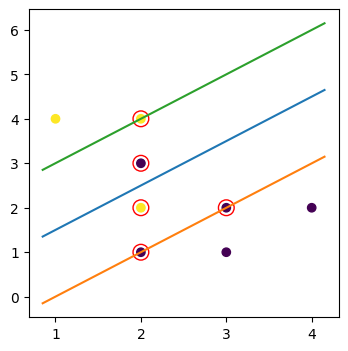

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(4, 4)); ax.scatter(*X.T, c=y)
x1 = np.linspace(*ax.get_xlim()); x2 = (-w[0]*x1 - w0)/w[1]
ax.plot(x1, x2, x1, x2 - 1/w[1], x1, x2 + 1/w[1])
ax.scatter(*clf.support_vectors_.T, s=128, facecolors='none', edgecolors='r');